In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.ticker import MaxNLocator
from sklearn.model_selection import ParameterGrid

#f1-f5

f1_alpha= 3 #1000 #set alpha of f1

f3_epsilon=1e-6 #set epsilon of f3

f45_q=10**8

def f1(x): #ellipsoid function
    dim=x.shape[0] #dimension number
    result=0
    for i in range(dim):
        result+=f1_alpha**(i/(dim-1))*x[i]**2
    return result

def g1(x):
    dim=x.shape[0]
    result=np.zeros(dim)
    for i in range(dim):
        result[i]=2*(f1_alpha**(i/(dim-1)))*x[i]
    return result

def h1(x):
    dim=x.shape[0]
    result=np.zeros((dim,dim))
    for i in range(dim):
        result[i,i]=2*(f1_alpha**(i/(dim-1)))
    return result

f2 = lambda x: (1-x[0])**2+100*(x[1]-x[0]**2)**2; #Rosenbrok function

g2 = lambda x: np.array([-400*x[0]*(x[1]-x[0]**2)-2*(1-x[0]), 200*(x[1]-x[0]**2)])

h2 = lambda x: np.array([[2+1200*x[0]**2-400*x[1], -400*x[0]], [-400*x[0], 200]])

f3 = lambda x: np.log(f3_epsilon+f1(x)) #log ellipsoid function

def g3(x):
    dim=x.shape[0]
    result=np.zeros(dim)
    for i in range(dim):
        result[i]=(2*f1_alpha**(i/(dim-1))*x[i])/(f3_epsilon+f1(x))
    return result

def h3(x):
    dim=x.shape[0]
    result=np.zeros((dim,dim))
    f1_elli=f1(x)
    for i in range(dim):
        for j in range(dim):
            if(i==j):
                result[i,j]=((2*f1_alpha**(i/(dim-1)))/(f3_epsilon+f1_elli)
                           - (2*x[i]**2)/(f3_epsilon+f1_elli)**2)
            else:
                result[i,j]=((-4*f1_alpha**((i+j)/(dim-1))*x[i]*x[j])
                           / (f3_epsilon+f1_elli)**2)
    return result

funch = lambda x: (np.log(1+np.exp(-np.absolute(f45_q*x)))+np.maximum(f45_q*x,0))/f45_q
  
def f4(x):
    if(isinstance(x, int) or isinstance(x, float)):
        return (funch(x) + 100*funch(-x))
    else:
        dim=x.shape[0] #dimension number
        result=0
        for i in range(dim):
            result+=funch(x[i])+100*funch(-x[i])
        return result

def h_d1(x):
    if x >= 0:
        return 1 / (1 + np.exp(-x * f45_q))
    return np.exp(x * f45_q) / (1 + np.exp(x * f45_q))

def h_d11(x):
    if x >= 0:
        return -(np.exp(-f45_q * x) / (1 + np.exp(-f45_q * x)))
    return -(1 / (1 + np.exp(f45_q * x)))

def h_d2(x):
    if x >= 0:
        return (f45_q * np.exp(-x * f45_q)) / (1 + np.exp(-x * f45_q))**2
    return (f45_q * np.exp(x * f45_q)) / (1 + np.exp(x * f45_q)) ** 2

def g4(x):
    if isinstance(x, int) or isinstance(x, float):
        return h_d1(x) - 100 * h_d1(-x)
    else:
        d = len(x)
        grad = np.zeros(d)
        for i in range(d):
            grad[i] = h_d1(x[i]) - 100 * h_d1(-x[i])
        return grad

def h4(x):
    if isinstance(x, int) or isinstance(x, float):
        return h_d2(x) + 100 * h_d2(-x)
    else:
        d = len(x)
        hessian = np.zeros((d, d))
        for i in range(d):
            hessian[i, i] = h_d2(x[i]) + 100 * h_d2(-x[i])
        return hessian

def f5(x):
    if(isinstance(x, int) or isinstance(x, float)):
        return funch(x)**2 + 100*funch(-x)**2
    else:
        dim=x.shape[0] #dimension number
        result=0
        for i in range(dim):
            result+=funch(x[i])**2+100*funch(-x[i])**2
        return result

def g5(x):
    if isinstance(x, int) or isinstance(x, float):
        return 2 * h(x) * h_d1(x) - 100 * 2 * h(-x) * h_d1(-x)
    else:
        d = len(x)
        grad = np.zeros(d)
        for i in range(d):
            grad[i] = 2 * funch(x[i]) * h_d1(x[i]) - 100 * 2 * funch(-x[i]) * h_d1(-x[i])
        return grad

def h5(x):
    if isinstance(x, int) or isinstance(x, float):
        return 2 * np.exp(f45_q * x) * (np.exp(f45_q * x) + np.log(np.exp(f45_q * x) + 1)) / (
                    np.exp(f45_q * x) + 1) ** 2 + 200 * np.exp(-2 * f45_q * x) * (
                           np.exp(f45_q * x) * np.log(np.exp(-f45_q * x) + 1) + 1) / (np.exp(-f45_q * x) + 1) ** 2
    else:
        d = len(x)
        hessian = np.zeros((d, d))
        for i in range(d):
            hessian[i, i] = 2 * h_d1(x[i])**2 + 2*funch(x[i])*h_d2(x[i]) + 200*h_d11(x[i])**2
            # 2 * np.exp(f45_q * x[i]) * (np.exp(f45_q * x[i]) + np.log(np.exp(f45_q * x[i]) + 1)) / (
            #     np.exp(f45_q * x[i]) + 1) ** 2 + 200 * np.exp(-2 * f45_q * x[i]) * (
            #            np.exp(f45_q * x[i]) * np.log(np.exp(-f45_q * x[i]) + 1) + 1) / (np.exp(-f45_q * x[i]) + 1) ** 2
        return hessian

# add noise
def noisy_g1(x):
    dim=x.shape[0]
    result=np.zeros(dim)
    for i in range(dim):
        noise = np.random.normal(0, 1)
        result[i]=2*(f1_alpha**(i/(dim-1)))*x[i]+noise
    return result

noisy_g2 = lambda x: np.array([-400*x[0]*(x[1]-x[0]**2)-2*(1-x[0])+np.random.normal(0, 1), 200*(x[1]-x[0]**2)+np.random.normal(0, 1)])

def noisy_g3(x):
    dim=x.shape[0]
    result=np.zeros(dim)
    for i in range(dim):
        noise = np.random.normal(0, 1)
        result[i]=(2*f1_alpha**(i/(dim-1))*x[i])/(f3_epsilon+f1(x))+noise
    return result

def noisy_g4(x):
    if isinstance(x, int) or isinstance(x, float):
        return h_d1(x) - 100 * h_d1(-x)
    else:
        d = len(x)
        grad = np.zeros(d)
        for i in range(d):
            noise = np.random.normal(0, 1)
            grad[i] = h_d1(x[i]) - 100 * h_d1(-x[i]) + noise
        return grad

def noisy_g5(x):
    if isinstance(x, int) or isinstance(x, float):
        return 2 * h(x) * h_d1(x) - 100 * 2 * h(-x) * h_d1(-x)
    else:
        d = len(x)
        grad = np.zeros(d)
        for i in range(d):
            noise = np.random.normal(0, 1)
            grad[i] = 2 * funch(x[i]) * h_d1(x[i]) - 100 * 2 * funch(-x[i]) * h_d1(-x[i]) + noise
        return grad

In [51]:
#plot

#set the start&end coord, step size and dimension number pf input set
def init_x(step,start,end,dimension):
    xi=np.arange(start, end, step); x=xi #initialization of input xi for each dimension
    for i in range(dimension-1):
        x=np.vstack((np.around(x,decimals=9),np.around(xi,decimals=9))) #make x to d dimensions, from xi
    return x

def gen2d(step,start,end,dimension,f):
    x=init_x(step,start,end,dimension) #0.01,-3.5,3.5,2
    X1,X2 = np.meshgrid(x[0], x[1]) #generate all the data point
    dtsize=X1.shape[0] #data point number
    Y=np.zeros((dtsize,dtsize)) #initialize output results to 2D
    for i in range(dtsize):
        for j in range(dtsize):
            X=np.vstack((np.around(X1[i,j],decimals=9),np.around(X2[i,j],decimals=9))) #choose every combination of 2D inputs
            Y[i,j]=f(X) #store the results
    return X1,X2,Y

#it takes set of points (on descent path, f_input)
def plot2d(X1,X2,Y,m,M,x0,f_input,name):
    fcount=f_input.shape[0]+1
    fx1=np.zeros(fcount)
    fx2=np.zeros(fcount)
    for i in range(fcount):
        if(i<=0):
            fx1[i]=x0[0]
            fx2[i]=x0[1]
        else:
            fx1[i]=f_input[i-1][0]
            fx2[i]=f_input[i-1][1]
    #plot in 2D with color
    box1=np.array([m[0],m[0],M[0],M[0],m[0]])
    box2=np.array([m[1],M[1],M[1],m[1],m[1]])
    fig, ax = plt.subplots()
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    if(name=='f2'):
    	lv=[0,1,3,10,30,100,300,1000,3000,5000,8000,11000,15000,19000,25000]
    	Cset = plt.contourf(X1, X2, Y, levels=lv, norm=colors.PowerNorm(gamma=0.25), cmap='coolwarm_r')
    elif(name=='f3'):
    	Cset = plt.contourf(X1, X2, Y, levels=15, norm=colors.PowerNorm(gamma=2), cmap='coolwarm_r')
    elif(name=='f4'):
    	lv=[0,1,3,6,10,15,25,50,100,150,200,250,300,350,410,480,560,650,750]
    	Cset = plt.contourf(X1, X2, Y, levels=lv, norm=colors.PowerNorm(gamma=0.5), cmap='coolwarm_r')
    elif(name=='f5'):
    	lv=[0,1,3,6,10,15,25,50,100,200,300,500,700,1000,1400,1900,2500]
    	Cset = plt.contourf(X1, X2, Y, levels=lv, norm=colors.PowerNorm(gamma=0.4), cmap='coolwarm_r')
    else:
    	#lv=[0,10,30,100,300,1000,2000,3300,4900,6800,8900,11300,13000]
    	#Cset = plt.contourf(X1, X2, Y, levels=lv,norm=colors.PowerNorm(gamma=0.4),cmap='coolwarm_r')
        Cset = plt.contourf(X1, X2, Y, levels=10, norm=colors.PowerNorm(gamma=1), cmap='coolwarm_r')
    plt.plot(box1, box2, c="r")
    plt.plot(fx1, fx2,c="k",linestyle="--")
    plt.colorbar(Cset)
    plt.title(name+' start at (%.1f,%.1f)' %(x0[0],x0[1]))
    plt.tight_layout()
    plt.savefig(name+'_2d.pdf')
    plt.show()
    #plt.close('all')

In [12]:
# background of functions (for contour)
f1_X1, f1_X2, f1_Y = gen2d(0.01,-3.5,3.5,2,f1)
f2_X1, f2_X2, f2_Y = gen2d(0.01,-3.5,3.5,2,f2)
f3_X1, f3_X2, f3_Y = gen2d(0.01,-3.5,3.5,2,f3)
f4_X1, f4_X2, f4_Y = gen2d(0.01,-3.5,3.5,2,f4)
f5_X1, f5_X2, f5_Y = gen2d(0.01,-3.5,3.5,2,f5)

In [57]:
# X = numpy array of size (number of points, 2)
#a = 1/T for non avg sdg
def sgd(dim, m, M, T, gradient, alpha, lamb, tol=1e-12, x0=None):
    w = np.zeros((T,dim))
    epsilon=1e-6
    alphad=alpha-0.3
    alphau=alpha+0.3
    #w[0,:] = np.random.rand(2)*rand_scale
    iteration=None
    if(x0 is None):
        for j in range(dim):
            w[0,j] = np.random.uniform(m[j], M[j]) #make the random start could be generating from -3 to 3 in 2 dimensions.
    else:
        w[0,:] = x0
    for t in range(1,T):
        try:
            g_t = gradient(w[t-1,:]) # if smooth
        except:
            g_t = (gradient(w[t-1,:]-epsilon) + gradient(w[t-1,:]+epsilon))/2  # if not smooth
        diff=g_t/(lamb*t)
        w[t,:] = np.clip(w[t-1,:]-diff, a_min=m.copy(), a_max=M.copy())
        #w[t,:] = projection(w, t, diff, constraints) # projection and update w_t
        if(np.linalg.norm(g_t) < tol or t>=T-1):
            iteration=t
            return (1/np.floor(alphad*iteration))*np.sum(w[int(np.ceil((1-alphad)*iteration)+1):iteration, :], axis=0), (1/np.floor(alpha*iteration))*np.sum(w[int(np.ceil((1-alpha)*iteration)+1):iteration, :], axis=0), (1/np.floor(alphau*iteration))*np.sum(w[int(np.ceil((1-alphau)*iteration)+1):iteration, :], axis=0), np.sum(w, axis=0)/iteration, w[iteration], iteration, w
            #here will get SGD-α(with α=0.3,0.5,0.7), alpha=1 will get SGD-A, the avg, and alpha=1/T will get non-avg (which is SGD-L)
'''
def projection(w, t, diff, constraints):
    dim = len(w[t,:])
    temp = (w[t-1,:] - diff).copy()
    for j in range(dim):
        if(temp[j]>=constraints[j]): temp[j]=constraints[j]
        elif(temp[j]<-constraints[j]): temp[j]=-constraints[j]
    return temp
'''
def get_best_param(g, ture_opti):    
    param_grid = {'rand_scale&box': [2], 'T' : [1, 10, 100, 1000, 10000, 100000, 1000000, 10000000], 'alpha': [0.5], 'lamb': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
    dim = len(ture_opti)
    grid = ParameterGrid(param_grid)
    optis = []
    good_param = []
    for params in grid:
        good_param.append(params)
        optis.append(sgd(dim, params['rand_scale&box'], params['T'], g, params['alpha'], params['lamb'], True, np.ones(dim)*params['rand_scale&box'])[0])

    optis = np.array(optis)
    good_param = np.array(good_param)
    mask = ~np.isnan(optis).any(axis=1)
    optis = optis[mask]
    good_param = good_param[mask]
    best = np.argmin(np.linalg.norm((np.abs(optis)-ture_opti), axis=1) , axis=0)
    return good_param[best], optis[best]

In [5]:
'''
#f_test = lambda w: np.linalg.norm(w)**2
#g_test = lambda w: 2*w

#f_goodpar, f_best = get_best_param(f_test, g_test, [0,0,0,0,0])

f1_goodpar, f1_best = get_best_param(g1, [0,0])
print(f1_goodpar)
'''

'\n#f_test = lambda w: np.linalg.norm(w)**2\n#g_test = lambda w: 2*w\n\n#f_goodpar, f_best = get_best_param(f_test, g_test, [0,0,0,0,0])\n\nf1_goodpar, f1_best = get_best_param(g1, [0,0])\nprint(f1_goodpar)\n'

In [6]:
'''
f2_goodpar, f2_best = get_best_param(g2, [1,1])
print(f2_goodpar)
f3_goodpar, f3_best = get_best_param(g3, [0,0])
print(f3_goodpar)
f4_goodpar, f4_best = get_best_param(g4, [0,0])
print(f4_goodpar)
f5_goodpar, f5_best = get_best_param(g5, [0,0])
print(f5_goodpar)
'''

'\nf2_goodpar, f2_best = get_best_param(g2, [1,1])\nprint(f2_goodpar)\nf3_goodpar, f3_best = get_best_param(g3, [0,0])\nprint(f3_goodpar)\nf4_goodpar, f4_best = get_best_param(g4, [0,0])\nprint(f4_goodpar)\nf5_goodpar, f5_best = get_best_param(g5, [0,0])\nprint(f5_goodpar)\n'

In [7]:
'''
def get_best_param_nonavg(g, ture_opti):    
    param_grid = {'rand_scale&box': [2], 'T' : [1, 10, 100, 1000, 10000, 100000, 1000000, 10000000], 'lamb': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
    dim = len(ture_opti)
    grid = ParameterGrid(param_grid)
    optis = []
    good_param = []
    for params in grid:
        good_param.append(params)
        optis.append(sgd(dim, params['rand_scale&box'], params['T'], g, 1/params['T'], params['lamb'], True, np.ones(dim)*params['rand_scale&box'])[0])

    optis = np.array(optis)
    good_param = np.array(good_param)
    mask = ~np.isnan(optis).any(axis=1)
    optis = optis[mask]
    good_param = good_param[mask]
    best = np.argmin(np.linalg.norm((np.abs(optis)-ture_opti), axis=1) , axis=0)
    return good_param[best], optis[best]
'''

"\ndef get_best_param_nonavg(g, ture_opti):    \n    param_grid = {'rand_scale&box': [2], 'T' : [1, 10, 100, 1000, 10000, 100000, 1000000, 10000000], 'lamb': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}\n    dim = len(ture_opti)\n    grid = ParameterGrid(param_grid)\n    optis = []\n    good_param = []\n    for params in grid:\n        good_param.append(params)\n        optis.append(sgd(dim, params['rand_scale&box'], params['T'], g, 1/params['T'], params['lamb'], True, np.ones(dim)*params['rand_scale&box'])[0])\n\n    optis = np.array(optis)\n    good_param = np.array(good_param)\n    mask = ~np.isnan(optis).any(axis=1)\n    optis = optis[mask]\n    good_param = good_param[mask]\n    best = np.argmin(np.linalg.norm((np.abs(optis)-ture_opti), axis=1) , axis=0)\n    return good_param[best], optis[best]\n"

In [8]:
'''
f1_goodpar2, f1_best2 = get_best_param_nonavg(g1, [0,0])
print(f1_goodpar2)
f2_goodpar2, f2_best2 = get_best_param_nonavg(g2, [1,1])
print(f2_goodpar2)
f3_goodpar2, f3_best2 = get_best_param_nonavg(g3, [0,0])
print(f3_goodpar2)
f4_goodpar2, f4_best2 = get_best_param_nonavg(g4, [0,0])
print(f4_goodpar2)
f5_goodpar2, f5_best2 = get_best_param_nonavg(g5, [0,0])
print(f5_goodpar2)
'''

'\nf1_goodpar2, f1_best2 = get_best_param_nonavg(g1, [0,0])\nprint(f1_goodpar2)\nf2_goodpar2, f2_best2 = get_best_param_nonavg(g2, [1,1])\nprint(f2_goodpar2)\nf3_goodpar2, f3_best2 = get_best_param_nonavg(g3, [0,0])\nprint(f3_goodpar2)\nf4_goodpar2, f4_best2 = get_best_param_nonavg(g4, [0,0])\nprint(f4_goodpar2)\nf5_goodpar2, f5_best2 = get_best_param_nonavg(g5, [0,0])\nprint(f5_goodpar2)\n'

In [107]:
def figure2_plot(f,g,random_scale,opt,lamb):
    X=np.arange(16,25,1) #[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
    X_points=len(X)
    T=np.zeros(X_points)
    dim=opt.shape[0]
    sample_size=10
    m = np.ones(dim)*(-random_scale)
    M = np.ones(dim)*random_scale

    wadl=np.zeros((sample_size,dim)); Yadl=np.zeros(sample_size)
    wal=np.zeros((sample_size,dim)); Yal=np.zeros(sample_size)
    waul=np.zeros((sample_size,dim)); Yaul=np.zeros(sample_size)
    wAl=np.zeros((sample_size,dim)); YAl=np.zeros(sample_size)
    wLl=np.zeros((sample_size,dim)); YLl=np.zeros(sample_size)
    Yad=np.zeros(X_points); Ya=np.zeros(X_points); Yau=np.zeros(X_points); YA=np.zeros(X_points); YL=np.zeros(X_points)
    Yerrad=np.zeros(X_points); Yerra=np.zeros(X_points); Yerrau=np.zeros(X_points); YerrA=np.zeros(X_points); YerrL=np.zeros(X_points)
    fig = plt.figure()
    for i in range(X_points):
        T[i]=2**(X[i]) #X=log_2(T)
        for j in range(sample_size):
            wadl[j], wal[j], waul[j], wAl[j], wLl[j], _, _ = sgd(dim, m, M, int(T[i]), g, 0.5, lamb, 1e-12)
            Yadl[j] = (f(wadl[j])-f(opt))*T[i]              #sgd(2, m, M, 5, 10000, noisy_gradf5, 0.5, 1, np.ones(2)*5)
            Yal[j] = (f(wal[j])-f(opt))*T[i]
            Yaul[j] = (f(waul[j])-f(opt))*T[i]
            YAl[j] = (f(wAl[j])-f(opt))*T[i]
            YLl[j] = (f(wLl[j])-f(opt))*T[i]
        Yad[i] = np.mean(Yadl); Ya[i] = np.mean(Yal); Yau[i] = np.mean(Yaul); YA[i] = np.mean(YAl); YL[i] = np.mean(YLl)
        Yerrad[i] = np.std(Yadl); Yerra[i] = np.std(Yal); Yerrau[i] = np.std(Yaul); YerrA[i] = np.std(YAl); YerrL[i] = np.std(YLl)
    plt.errorbar(X, Yad, yerr=Yerrad, label='SGD-α=0.2')
    plt.errorbar(X, Ya, yerr=Yerra, label='SGD-α=0.5')
    plt.errorbar(X, Yau, yerr=Yerrau, label='SGD-α=0.8')
    plt.errorbar(X, YA, yerr=YerrA, label='SGD-A')
    plt.errorbar(X, YL, yerr=YerrL, label='SGD-L')
    plt.legend()
    plt.yscale("log")
    plt.ylabel('(F(wT)-F(w*))*T')
    plt.xlabel('log2(T)')
    plt.tight_layout()
    plt.savefig('test111.pdf')
    plt.show()
    return Ya, YA, YL

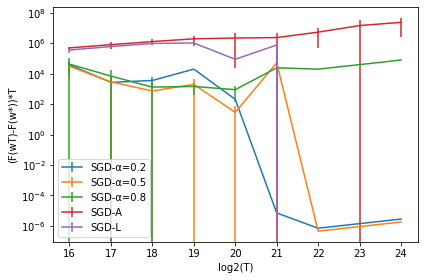

[3.03201439e+04 2.87719626e+03 7.25049501e+02 1.95613667e+03
 2.86480593e+01 5.10153458e+04 4.54485416e-07 9.08970833e-07
 1.81794167e-06]
[  488011.97773406   793073.76162352  1263689.90124453  1920618.95997949
  2163041.98810664  2322787.49664928  5262509.20347899 14250156.10437391
 23141144.77059885]
[ 355167.5525535   594197.4505338   957579.88692388 1022032.41425016
   87240.65838526  750848.47064565       0.               0.
       0.        ]


In [108]:
#f_t = lambda w: np.linalg.norm(w)**2
#g_t = lambda w: w

def f_t(w):
    if w[0] >= 0:
        return 1/2*np.linalg.norm(w)**2 + w[0]
    else:
        return 1/2*np.linalg.norm(w)**2 - 7*w[0]
def g_t(w):
    Z = np.random.uniform(-1,3)
    vec = np.zeros(len(w))
    if w[0] >= 0:
        vec[0] = Z
        return w + vec
    else:
        vec[0] = -7
        return w + vec

Ya,YA,YL = figure2_plot(f3, g3, 3.5, np.array([0,0]), 1) #here you can change f_t, g_t to f1-f5, g1-g5(or noisy_g1-g5), and change the constraints to 3.49, remain lambda as 1, will get the plot of f1-f5 in our report.
print(Ya)
print(YA)
print(YL)

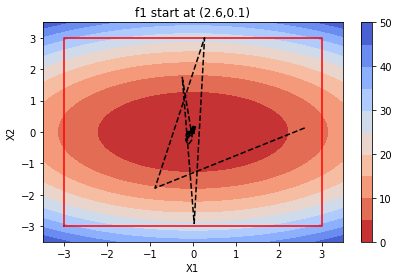

[-2.89387090e-05  1.24111197e-04] [ 8.64886944e-04 -2.72225087e-05] [0.00134875 0.00010537] [0.0013834  0.00039587] [-0.00061324  0.00027618] 65535


In [124]:
m=np.array([-3,-3]); M=np.array([3,3])
result1, result2, result3, result4, result5, t, f1_input = sgd(2, m, M, 65536, noisy_g1, 0.5, 1)
plot2d(f1_X1, f1_X2, f1_Y, m, M, f1_input[0,:], f1_input, name="f1")
print(result1,result2,result3,result4,result5,t)

In [118]:
print(f1_input[100000-99000])

[0.00580865 0.00540294]


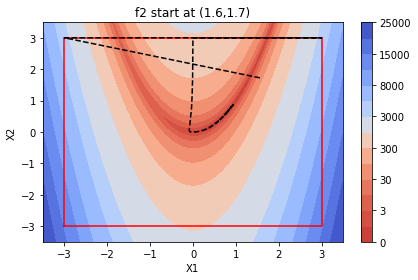

[0.92660471 0.85833172] [0.91914859 0.84456832] [0.9044065  0.81802616] [0.85627562 0.81076262] [0.9303762  0.86497216] 65535


In [126]:
result1, result2, result3, result4, result5, t, f2_input = sgd(2, m, M, 65536, noisy_g2, 0.5, 1)
plot2d(f2_X1, f2_X2, f2_Y, m, M, f2_input[0,:], f2_input, name="f2")
print(result1,result2,result3,result4,result5,t)

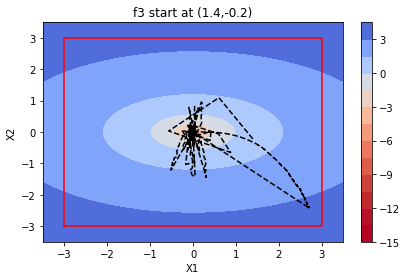

[9.80078521e-05 5.49541881e-04] [8.87658478e-05 6.16656766e-04] [9.16210988e-05 9.69721300e-04] [ 0.17376268 -0.07540266] [-0.00104952  0.00714654] 65535


In [120]:
result1, result2, result3, result4, result5, t, f3_input = sgd(2, m, M, 65536, noisy_g3, 0.5, 1)
plot2d(f3_X1, f3_X2, f3_Y, m, M, f3_input[0,:], f3_input, name="f3")
print(result1,result2,result3,result4,result5,t)

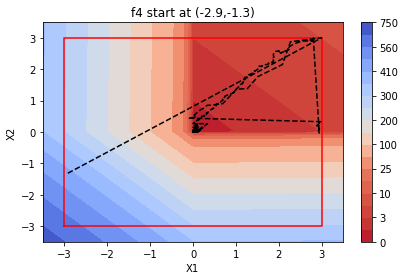

[0.00085684 0.00084611] [0.00105105 0.00104865] [0.00152276 0.00152055] [0.00793604 0.00917423] [0.00012268 0.00134877] 65535


In [122]:
result1, result2, result3, result4, result5, t, f4_input = sgd(2, m, M, 65536, noisy_g4, 0.5, 1)
plot2d(f4_X1, f4_X2, f4_Y, m, M, f4_input[0,:], f4_input, name="f4")
print(result1,result2,result3,result4,result5,t)

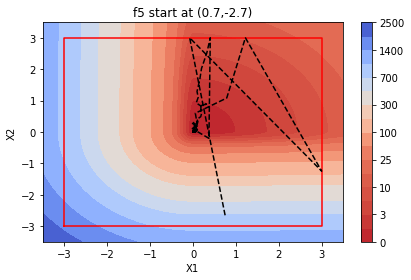

[9.48694215e-05 4.61517183e-03] [0.00029751 0.0046751 ] [0.00135745 0.00372378] [0.00307208 0.00517516] [2.12891562e-05 4.00120314e-03] 65535


In [123]:
result1, result2, result3, result4, result5, t, f5_input = sgd(2, m, M, 65536, noisy_g5, 0.5, 1)
plot2d(f5_X1, f5_X2, f5_Y, m, M, f5_input[0,:], f5_input, name="f5")
print(result1,result2,result3,result4,result5,t)

[0.00754031 0.02453835] 9999
<ipython-input-50-ffadc9caef5b>:19: RuntimeWarning: invalid value encountered in log
  ys = [np.log(F(wt)) for wt in ws]
[-0.00441085  0.0038885 ] 9999
<ipython-input-50-ffadc9caef5b>:19: RuntimeWarning: invalid value encountered in log
  ys = [np.log(F(wt)) for wt in ws]
[1.65882394 2.75416664] 9999
[0.00046559 0.00198901] 9999
[0.00269899 0.00080828] 9999


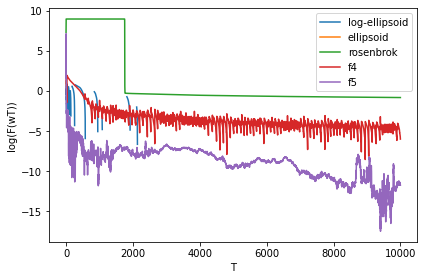

In [50]:
#import math
from matplotlib.font_manager import FontProperties

def plotting(ws, w, t, F, label=""):
    fontP = FontProperties()
    #fontP.set_size('xx-small')
    ys = [(F(w_t)-F(w))*t for w_t in ws]
    xs = np.arange(t+1)
    plt.plot(xs, ys, label=label)
    plt.yscale("log")
    #plt.xscale("log")
    plt.xlabel("T")
    plt.ylabel("(F(wT)-F(w*))*T")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)

# plot loss
def plot_loss(ws, t, F, label=""):
    #fontP = FontProperties()
    ys = [np.log(F(wt)) for wt in ws]
    xs = np.arange(t+1)
    plt.plot(xs, ys, label=label)
    plt.ylabel("log(F(wT))")
    #plt.xscale("log")
    plt.xlabel("T")
    #plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
    plt.legend()

m = np.array([-3.5,-3.5])
M = np.array([3.5,3.5])

#w,t, ws = SGD(noisy_gradf1,d,lamb,10000,m,M) #d=2, lamb=1, T=10000, constriant=[-5,5][-5,5], alpha=0.5
wad, wa, wau, wA, wL, t, w3 = sgd(2, m, M, 10000, noisy_g3, 0.5, 1, 1e-60)
print(wL,t)
#plotting(w3, np.array([0,0]), t, f3, "log-ellipsoid")
plot_loss(w3, t, f3, "log-ellipsoid")

wad, wa, wau, wA, wL, t, w1 = sgd(2, m, M, 10000, noisy_g1, 0.5, 1, 1e-60)
print(wL,t)
#plotting(w1, np.array([0,0]), t, f1, "ellipsoid")
plot_loss(w1, t, f3, "ellipsoid")

wad, wa, wau, wA, wL, t, w2 = sgd(2, m, M, 10000, noisy_g2, 0.5, 1, 1e-60)
print(wL,t)
#plotting(w2, np.array([1,1]), t, f2, "rosenbrok") # non convex
plot_loss(w2, t, f2, "rosenbrok")

wad, wa, wau, wA, wL, t, w4 = sgd(2, m, M, 10000, noisy_g4, 0.5, 1, 1e-60)
print(wL,t)
#plotting(w4, np.array([0,0]), t, f4, "f4") # step size to big so it does not find minimum
plot_loss(w4, t, f4, "f4")

wad, wa, wau, wA, wL, t, w5 = sgd(2, m, M, 10000, noisy_g5, 0.5, 1, 1e-60)
print(wL,t)
#plotting(w5, np.array([0,0]), t, f5, "f5")
plot_loss(w5, t, f5, "f5")

plt.tight_layout()
plt.savefig("noisy2.pdf")
plt.show()

In [78]:
subsolver = lambda x, g, A, m, M: max(m-x, min(M-x, -(g/A)))

def kkt(x, g, m, M):
	h=np.zeros_like(g)
	if(isinstance(x,float)==False):
		for i in range(len(h)):
			'''
			if (x[i]==m[i] and g[i]>0):
				h[i]=0
			elif (x[i]==M[i] and g[i]<0):
				h[i]=0
			'''
			if not (x[i]==m[i] and g[i]>0) and not (x[i]==M[i] and g[i]<0):
				h[i]=g[i]
	else:
		if not (x==m and g>0) and not (x==M and g<0):
			h=g
	return h

def coord_descent(A, b, f, g, m, M, x, epsilon=1e-16, max_iter=10000):
	x=-(np.linalg.inv(A)@b) #try Newton
	if(x<=M).all() and (x>=m).all(): #Newton step, one iter, no g, no h
		return x, 1, [x], [f(x)], [], []
	#x=np.array([m.sum()/2,M.sum()/2]) #center as initial point
	all_x=[]; all_y=[]; all_g=[]; all_h=[]
	if(isinstance(x,float)==False):
		all_x.append([x[k] for k in range(x.shape[0])])
		all_y.append(f(x))
	else:
		all_x.append(x)
		all_y.append(f(np.matrix(x)))
	g=g(x); it=0
	stop=False
	while(stop is not True):
		if(isinstance(x,float)==False):
			for i in range(x.shape[0]):
				alpha = subsolver(x[i], g[i], A[i,i], m[i], M[i]) #view alpha as vector
				x[i]+=alpha
				g=g+alpha*A[i] #upgrade gradient
				all_g.append(g)
				h=kkt(x, g, m, M) #deal as matrix
				all_h.append(h)
				all_x.append([x[k] for k in range(x.shape[0])])
				#print(x,all_x)
				all_y.append(f(x))
				it+=1
				if np.linalg.norm(h)<epsilon or it>=max_iter:
					stop=True
					break
		else:
			alpha = subsolver(x, g, A, m, M) #view alpha as single number
			x+=alpha
			g=g+alpha*A
			all_g.append(g)
			h=kkt(x, g, m, M)
			all_h.append(h)
			all_x.append(x)
			all_y.append(f(np.matrix(x)))
			it+=1
			if np.linalg.norm(h)<epsilon or it>=max_iter:
				stop=True
				break
	return x, it, all_x, all_y, all_g, all_h

def gen_prob(d, mean=0, std=0.01):
	B = np.random.normal(size=(d,d))
	A = B@B.T
	m = -np.ones(d)
	M = np.ones(d)
	b = np.random.normal(mean, std, d)
	return A, b, m, M

0.33314487557919975
0.3343003349618436
0.3360431954159878
0.33870682321800194
0.3325208906308485


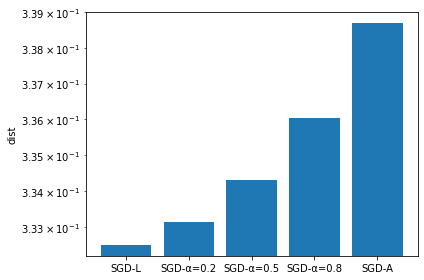

In [102]:
def check_result(dim, check_times):
    dist1=[]; dist2=[]; dist3=[]; distA=[]; distL=[]
    for i in range(check_times):
        A, b, m, M = gen_prob(dim)
        x0=np.zeros(dim)
        for j in range(dim):
            x0[j] = np.random.uniform(m[j], M[j])
        f = lambda x: 0.5*x.T@A@x+b.T@x
        if(isinstance(x0,float)==False):
            g = lambda x: A@x+b
        else:
            g = lambda x: A@np.matrix(x)+b
        final_x, it1, _, _, _, _ = coord_descent(A, b, f, g, m, M, x0, 1e-16, 10000)
        wad, wa, wau, wA, wL, it2, _ = sgd(dim, m, M, 10001, g, 0.5, 1, 1e-16, x0)
        dist1.append(np.linalg.norm(wad-final_x))
        dist2.append(np.linalg.norm(wa-final_x))
        dist3.append(np.linalg.norm(wau-final_x))
        distA.append(np.linalg.norm(wA-final_x))
        distL.append(np.linalg.norm(wL-final_x))
        #print(it1,it2)
    mean1=np.mean(np.array(dist1)); mean2=np.mean(np.array(dist2)); mean3=np.mean(np.array(dist3)); meanA=np.mean(np.array(distA));meanL=np.mean(np.array(distL))
    print(mean1) #0.2
    print(mean2) #0.5
    print(mean3) #0.8
    print(meanA) #1.0
    print(meanL) #1/T (last element)
    barp=[meanL,mean1,mean2,mean3,meanA]
    barpmean=np.mean(np.array(barp))
    barp_minus_mean=barp-barpmean
    barpname=['SGD-L','SGD-α=0.2','SGD-α=0.5','SGD-α=0.8','SGD-A']
    plt.bar(barpname, barp)
    plt.yscale("log")
    plt.ylabel("dist")
    plt.tight_layout()
    plt.savefig("dist.pdf")
    plt.show()

check_result(5, 1000)